In [48]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_curve

In [49]:
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("real_y_train.csv").squeeze()
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("real_y_test.csv").squeeze()
X_val = pd.read_csv("X_val.csv")
y_val = pd.read_csv("real_y_val.csv")

In [50]:
X_train.head()

,Unnamed: 0,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,7916,28,48,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,26447,23,20,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,20889,51,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,30145,65,55,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,7473,35,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [51]:
'''
# Create neighbors
neighbors = np.arange(1,13)
train_accuracies = {}
test_accuracies = {}
best_train = 0
best_test = 0

for neighbor in neighbors:
  
    # Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor)
  
    # Fit the model
    knn.fit(X_train, y_train)
  
    # Compute accuracy
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
    
    if(train_accuracies[neighbor] > best_train):
        best_train = train_accuracies[neighbor]
    if(test_accuracies[neighbor] > best_test):
        best_test = test_accuracies[neighbor]
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)
print("best train:", best_train,"best_test:", best_test)
'''

'\n# Create neighbors\nneighbors = np.arange(1,13)\ntrain_accuracies = {}\ntest_accuracies = {}\nbest_train = 0\nbest_test = 0\n\nfor neighbor in neighbors:\n  \n    # Set up a KNN Classifier\n    knn = KNeighborsClassifier(n_neighbors=neighbor)\n  \n    #\xa0Fit the model\n    knn.fit(X_train, y_train)\n  \n    # Compute accuracy\n    train_accuracies[neighbor] = knn.score(X_train, y_train)\n    test_accuracies[neighbor] = knn.score(X_test, y_test)\n    \n    if(train_accuracies[neighbor] > best_train):\n        best_train = train_accuracies[neighbor]\n    if(test_accuracies[neighbor] > best_test):\n        best_test = test_accuracies[neighbor]\nprint(neighbors, \'\n\', train_accuracies, \'\n\', test_accuracies)\nprint("best train:", best_train,"best_test:", best_test)\n'

In [52]:

'''
#Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()
'''

'\n#Add a title\nplt.title("KNN: Varying Number of Neighbors")\n\n#\xa0Plot training accuracies\nplt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")\n\n# Plot test accuracies\nplt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")\n\nplt.legend()\nplt.xlabel("Number of Neighbors")\nplt.ylabel("Accuracy")\n\n# Display the plot\nplt.show()\n'

In [53]:
#Use a knn of 7 for highest for training and testing

knn_final = KNeighborsClassifier(n_neighbors=7)
  
# Fit the model
knn_final.fit(X_train, y_train)
  
y_pred = knn_final.predict(X_val)

print("Predictions: {}".format(y_pred)) 



Predictions: [1 1 1 ... 1 1 0]


In [54]:
cm_knn = confusion_matrix(y_val,y_pred)
cm_knn
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

<AxesSubplot:>

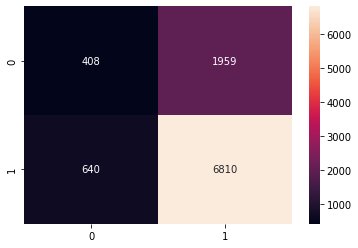

In [55]:
sns.heatmap(cm_knn,annot=True,fmt="d")

In [56]:
#Evaluate the model 
val_accuracy = accuracy_score(y_val, y_pred)
val_precision = precision_score(y_val,y_pred)
val_recall = recall_score(y_val,y_pred)
val_f1 = f1_score(y_val,y_pred)
val_specificity = tn / (tn + fp)
print("-----Validation Performance-----")
print("Val Accuracy:", val_accuracy)
print("Val Precision", val_precision)
print("Val Recall", val_recall)
print("Val F1 Score", val_f1)
print("Validation Specificity", val_specificity)



-----Validation Performance-----
Val Accuracy: 0.7352551696037486
Val Precision 0.776599384194321
Val Recall 0.9140939597315436
Val F1 Score 0.8397558419138048
Validation Specificity 0.17237008871989862


[0.         0.09167723 0.32910858 0.61596958 0.82762991 0.94761301
 0.99070553 0.99915505 1.        ]
[0.         0.23369128 0.52630872 0.76563758 0.91409396 0.97651007
 0.99530201 0.99959732 1.        ]


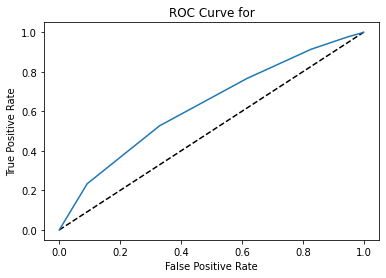

In [66]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_val_bin = lb.fit_transform(y_val).ravel()

y_val_prob = knn_final.predict_proba(X_val)[:,1]
fpr, tpr, thresholds = roc_curve(y_val_bin, y_val_prob)

print(fpr)
print(tpr)
plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for')
plt.show()


In [70]:
fpr

array([0.        , 0.09167723, 0.32910858, 0.61596958, 0.82762991,
       0.94761301, 0.99070553, 0.99915505, 1.        ])

In [71]:
tpr

array([0.        , 0.23369128, 0.52630872, 0.76563758, 0.91409396,
       0.97651007, 0.99530201, 0.99959732, 1.        ])